In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

In [2]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return round(m, 4), round(m-h, 4), round(m+h, 4)

####  Импорт таблиц

In [3]:
no_cheaters = pd.read_csv('no_cheaters.csv')
no_cheaters.head()

,user_id,group,cheaters,cash,money
0,VX6NLA-F5YMSW,control,0,5050,5.96
1,2AXN3D-71ZN86,test,0,5600,4.96
2,K78V3J-TQMV6F,test,0,5850,3.96
3,Z2KEIG-LY3V4H,test,0,5900,4.96
4,ND92RZ-SHG980,control,0,9000,9.94


In [4]:
# Фильтрация данных для групп
test_group = no_cheaters[no_cheaters['group']=='test']
control_group = no_cheaters[no_cheaters['group']=='control']

### Рассчет ARPU

In [10]:
arpu_test = test_group['money'].sum()/test_group['user_id'].nunique()
round(arpu_test, 4)

6.1623

In [11]:
arpu_control = control_group['money'].sum()/control_group['user_id'].nunique()
round(arpu_control, 4)

5.8295

### Рассчет ARPPU

In [14]:
arppu_t = test_group[test_group['money']>0]
arppu_c = control_group[control_group['money']>0]

In [15]:
arppu_test = arppu_t['money'].sum()/arppu_t['user_id'].nunique()
round(arppu_test, 4)

6.1631

In [16]:
arppu_control = arppu_c['money'].sum()/arppu_c['user_id'].nunique()
round(arppu_control, 4)

5.8311

### Рассчет средних трат внтриигровой валюты

In [35]:
cash_test = test_group['cash'].sum()/test_group['user_id'].nunique()
round(cash_test, 4)

6229.5963

In [36]:
control_test = control_group['cash'].sum()/control_group['user_id'].nunique()
round(control_test, 4)

5800.7054

### Расчет доверительного интервала ARPU

In [22]:
test_group.head()

,user_id,group,cheaters,cash,money
1,2AXN3D-71ZN86,test,0,5600,4.96
2,K78V3J-TQMV6F,test,0,5850,3.96
3,Z2KEIG-LY3V4H,test,0,5900,4.96
6,L48T70-W483B3,test,0,8550,7.96
8,X2N7P6-8AM85H,test,0,5950,9.92


In [23]:
test_interval = mean_confidence_interval(list(test_group['money']), confidence=0.95)

In [24]:
test_interval

(6.1623, 6.1572, 6.1674)

In [25]:
control_interval = mean_confidence_interval(list(control_group['money']), confidence=0.95)
control_interval

(5.8295, 5.8245, 5.8345)

#### Построение графика пересечения доверительных интервалов ARPU

In [26]:
groups = ['test_group', 'control_group']
means = [test_interval[0], control_interval[0]]
lower_bounds = [test_interval[0] - test_interval[1], control_interval[0] - control_interval[1]]
upper_bounds = [test_interval[2] - test_interval[0], control_interval[2] - control_interval[0]]

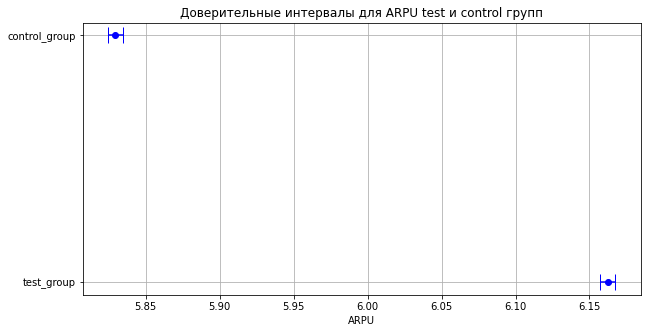

In [27]:
plt.figure(figsize=(10, 5))
plt.errorbar(x=means, y=groups, xerr=[lower_bounds, upper_bounds], fmt='o', color='blue', capsize=8)
plt.xlabel('ARPU')
plt.title('Доверительные интервалы для ARPU test и control групп')
plt.grid(True)
plt.show()

### Расчет доверительного интервала ARPPU

In [29]:
test_interval = mean_confidence_interval(list(test_group[test_group.money>0]['money']), confidence=0.95)
test_interval

(6.1631, 6.158, 6.1682)

In [32]:
control_interval = mean_confidence_interval(list(control_group[control_group.money>0]['money']), confidence=0.95)
control_interval

(5.8311, 5.8261, 5.8361)

#### Построение графика пересечения доверительных интервалов ARPPU

In [33]:
groups = ['test_group', 'control_group']
means = [test_interval[0], control_interval[0]]
lower_bounds = [test_interval[0] - test_interval[1], control_interval[0] - control_interval[1]]
upper_bounds = [test_interval[2] - test_interval[0], control_interval[2] - control_interval[0]]

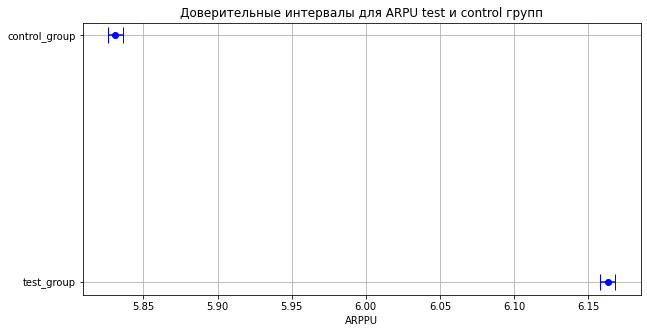

In [34]:
plt.figure(figsize=(10, 5))
plt.errorbar(x=means, y=groups, xerr=[lower_bounds, upper_bounds], fmt='o', color='blue', capsize=8)
plt.xlabel('ARPPU')
plt.title('Доверительные интервалы для ARPPU test и control групп')
plt.grid(True)
plt.show()

### Расчет доверительного интервала средних трат внутриигровой валюты

In [38]:
test_interval = mean_confidence_interval(list(test_group['cash']), confidence=0.95)
test_interval

(6229.5963, 6225.8294, 6233.3632)

In [39]:
control_interval = mean_confidence_interval(list(control_group['cash']), confidence=0.95)
control_interval

(5800.7054, 5797.1124, 5804.2983)

#### Построение графика пересечения доверительных интервалов средних трат внутриигровой валюты

In [41]:
groups = ['test_group', 'control_group']
means = [test_interval[0], control_interval[0]]
lower_bounds = [test_interval[0] - test_interval[1], control_interval[0] - control_interval[1]]
upper_bounds = [test_interval[2] - test_interval[0], control_interval[2] - control_interval[0]]

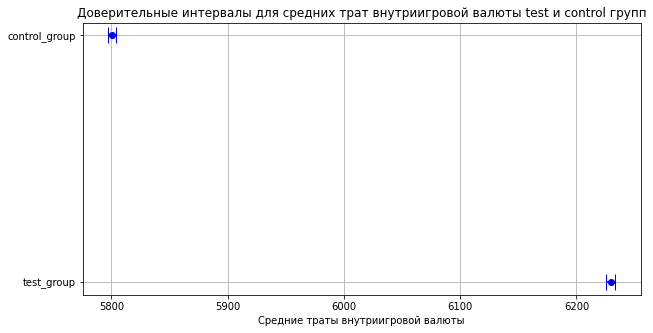

In [42]:
plt.figure(figsize=(10, 5))
plt.errorbar(x=means, y=groups, xerr=[lower_bounds, upper_bounds], fmt='o', color='blue', capsize=8)
plt.xlabel('Средние траты внутриигровой валюты')
plt.title('Доверительные интервалы для средних трат внутриигровой валюты test и control групп')
plt.grid(True)
plt.show()